In [364]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bram/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/bram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [335]:
class Analysis():
    def __init__(self, tags, OCAbbrev):
        self.content = {"other":{"count":0,"words":[]}}
        self.allTags = []
        self.OCAbbrev = OCAbbrev
        for tag in tags:
            self.content[tag] = {"count":0,"words":[]}
    def add(self,word,tag):
        if tag in self.content:
            self.content[tag]["count"] += 1
            self.content[tag]["words"] += [word]
            self.allTags += [tag]
        else:
            self.content["other"]["count"] += 1
            self.content["other"]["words"] += [word]
            self.allTags += ["other"]
    def tagOccurence(self):
        tagOcc = {}
        for key,value in self.content.items():
            tagOcc[key] = value["count"]
        return tagOcc
    
    def tag_words(self,text):
        tagged_words = []
        sentences = nltk.sent_tokenize(text)  
        for sentence in sentences:
            tagged_words += pos_tag(nltk.word_tokenize(sentence))

        for (word,tag) in tagged_words:
            try:
                long_tag = self.OCAbbrev[tag]
            except:
                long_tag = tag

            
            self.add(word,long_tag)


**Declaring the abbreviations:**

In [322]:
OCAbbrev = {"FW":"foreign word", "JJ":"adjective", "JJR":"adjective", "JJS":"adjective", "NN":"noun", "NNS":"noun", "NNP":"noun","NNPS":"noun","RB":"adverb","RBR":"adverb", "RBS":"adverb", "MD":"modal", "VB":"verb","VBD":"verb","VBG":"verb","VBN":"verb", "VBP":"verb", "VBZ":"verb"}
tags = ["noun","verb", "adjective", "adverb", "foreign word", "modal"]

**Input field:**
* copy-paste text
* Remove all enters
* Replace "*text*" with '*text*'
* Replace all apostrophes with \accents for example: pilgrim's -> pilgrim\\'s

In [329]:
speech1 = "Happy Christmas. Twenty-five years ago my grandfather broadcast the first of these Christmas messages. Today is another landmark because television has made it possible for many of you to see me in your homes on Christmas Day. My own family often gather round to watch television as they are this moment, and that is how I imagine you now. I very much hope that this new medium will make my Christmas message more personal and direct. It is inevitable that I should seem a rather remote figure to many of you. A successor to the Kings and Queens of history; someone whose face may be familiar in newspapers and films but who never really touches your personal lives. But now at least for a few minutes I welcome you to the peace of my own home. That it is possible for some of you to see me today is just another example of the speed at which things are changing all around us. Because of these changes I am not surprised that many people feel lost and unable to decide what to hold on to and what to discard. How to take advantage of the new life without losing the best of the old. But it is not the new inventions which are the difficulty. The trouble is caused by unthinking people who carelessly throw away ageless ideals as if they were old and outworn machinery. They would have religion thrown aside, morality in personal and public life made meaningless, honesty counted as foolishness and self-interest set up in place of self-restraint. At this critical moment in our history we will certainly lose the trust and respect of the world if we just abandon those fundamental principles which guided the men and women who built the greatness of this country and Commonwealth. Today we need a special kind of courage, not the kind needed in battle but a kind which makes us stand up for everything that we know is right, everything that is true and honest. We need the kind of courage that can withstand the subtle corruption of the cynics so that we can show the world that we are not afraid of the future. It has always been easy to hate and destroy. To build and to cherish is much more difficult. That is why we can take a pride in the new Commonwealth we are building. This year Ghana and Malaya joined our brotherhood. Both these countries are now entirely self-governing. Both achieved their new status amicably and peacefully.This advance is a wonderful tribute to the efforts of men of goodwill who have worked together as friends, and I welcome these two countries with all my heart. Last October I opened the new Canadian Parliament, and as you know this was the first time that any Sovereign had done so in Ottawa. Once again I was overwhelmed by the loyalty and enthusiasm of my Canadian people. Also during 1957 my husband and I paid visits to Portugal, France, Denmark and the United States of America. In each case the arrangements and formalities were managed with great skill but no one could have 'managed' the welcome we received from the people. In each country I was welcomed as Head of the Commonwealth and as your representative. These nations are our friends largely because we have always tried to do our best to be honest and kindly and because we have tried to stand up for what we believe to be right. In the old days the monarch led his soldiers on the battlefield and his leadership at all times was close and personal. Today things are very different. I cannot lead you into battle, I do not give you laws or administer justice but I can do something else, I can give you my heart and my devotion to these old islands and to all the peoples of our brotherhood of nations. I believe in our qualities and in our strength, I believe that together we can set an example to the world which will encourage upright people everywhere. I would like to read you a few lines from 'Pilgrim\'s Progress', because I am sure we can say with Mr Valiant for Truth, these words: 'Though with great difficulty I am got hither, yet now I do not repent me of all the trouble I have been at to arrive where I am. My sword I give to him that shall succeed me in my pilgrimage and my courage and skill to him that can get it. My marks and scars I carry with me, to be a witness for me that I have fought his battles who now will be my rewarder.' I hope that 1958 may bring you God's blessing and all the things you long for. And so I wish you all, young and old, wherever you may be, all the fun and enjoyment, and the peace of a very happy Christmas."

**Detecting sentences and tagging words**

In [352]:
analysis = Analysis(tags,OCAbbrev)
analysis.tag_words(speech1)
data = pd.DataFrame.from_dict({"tags":analysis.allTags}).sort_values("tags")

In [353]:
occurences = analysis.tagOccurence()
print("Words:" + str(sum([occurences[key] for key in occurences])))
print(occurences)
sns.catplot(x="tags", kind="count", palette="ch:.25", data=data.loc[data["tags"]!="other"]);

Words:894
{'other': 453, 'noun': 173, 'verb': 136, 'adjective': 65, 'adverb': 46, 'foreign word': 0, 'modal': 21}


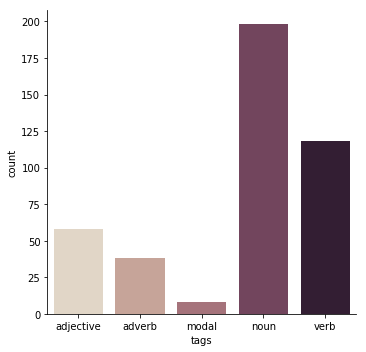